**Supervised vs Unsupervised Learning**

What is Machine Learning?
* Algorithms that can learn from observational data, and can make predictions based on it.

What is Unsupervised Learning?
* The model is not given any "answers" to learn from; it must make sense of the data just given the observations themselves.
* Latent variables - things that you don't know what you're looking for
* Examples: 
1. clustering users on a dating site based on their information and behavior, 
2. cluster movies based on their properties, 
3. analyze the text of product descriptions

What is Supervised Learning?
* The data the algorithm "learns" from comes with the "correct" answers.
* The model created is then used to predict the answer for new, unknown values.
* Examples:
1. Train a model for predicting car prices based on car attributes using historical sales data 

Evaluating Supervised Learning

* Train / Test method:
1. Use a set of training data and split it into two parts: A training set and a test set
2. Train the model using only the training set
3. Measure (using r² or some other metrics) the model's accuracy by asking it to predict values for the test set, and compare that to the known, true values
4. Use K-fold Cross Validation to further protect against overfitting

**Example of Train / Test:**

Start by generating a data set that we want to build a model for (in this case a polynomial regression)

In [1]:
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds

Then, create a scatter plot to visualize the data

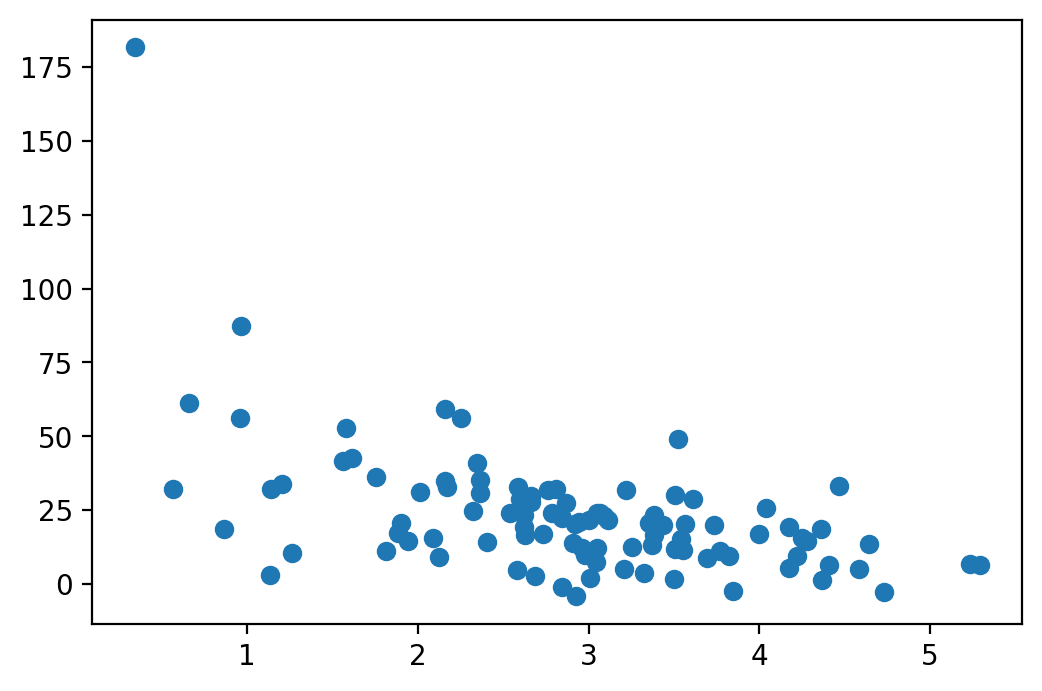

In [2]:
plt.figure(dpi=200)
plt.scatter(pageSpeeds, purchaseAmount)

Then, split the data in two:
- 80 % will be used for "training" our model
- 20 % will be used for "testing" our model

In [3]:
trainX = pageSpeeds[:80] # 80% for training
testX = pageSpeeds[80:] # 20% for testing

trainY = purchaseAmount[:80] # 80% for training
testY = purchaseAmount[80:] # 20% for testing

Let's visualize our "Training" set

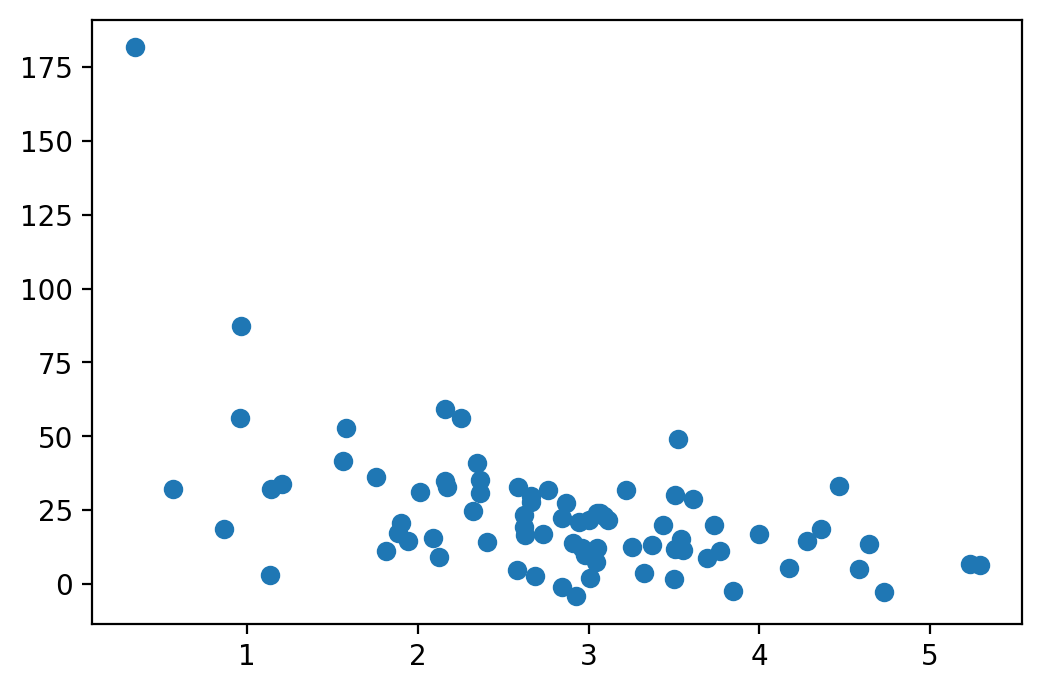

In [4]:
plt.figure(dpi=200)
plt.scatter(trainX, trainY)

and visualize our "Test" set

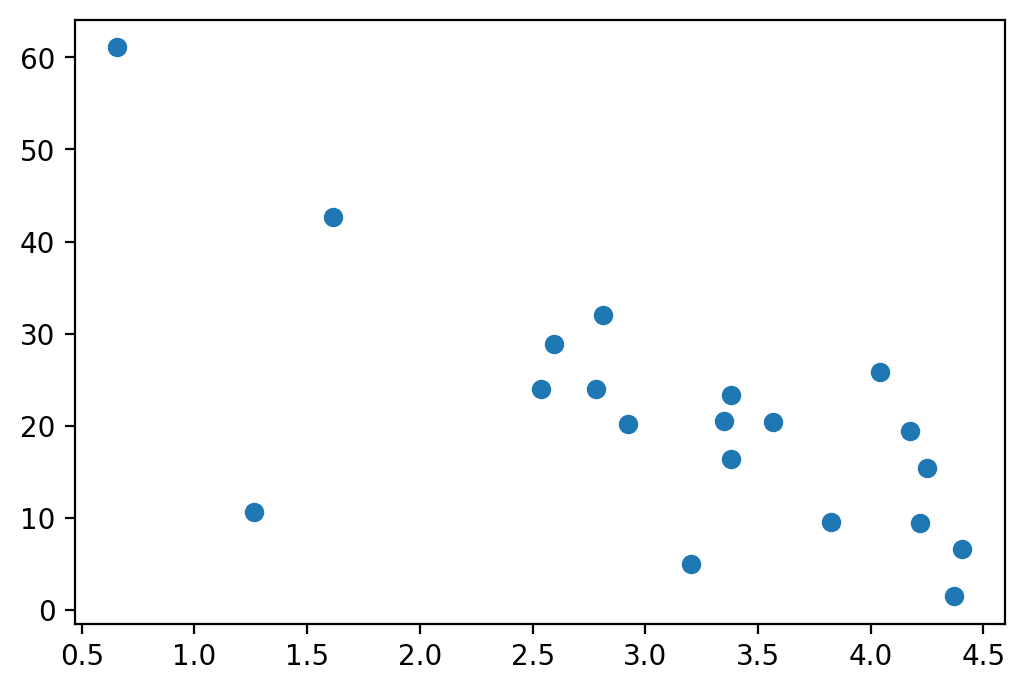

In [5]:
plt.figure(dpi=200)
plt.scatter(testX, testY)

Now, using Polynomial regression, try to fit an 8th-degree polynomial to the data

In [6]:
x = np.array(trainX) # Converts the training set array of page speeds into a NumPy array named x
y = np.array(trainY) # Converts the training set array of purchase amount into a NumPy array named y

p4 = np.poly1d(np.polyfit(x, y, 8))
print(p4)

       8         7         6         5        4        3        2
0.734 x - 17.01 x + 165.7 x - 881.9 x + 2788 x - 5315 x + 5898 x - 3442 x + 838.4


Calculate the r² score for the training data:

In [7]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)

0.642706951469121


Then, plot the polynomial against the training data

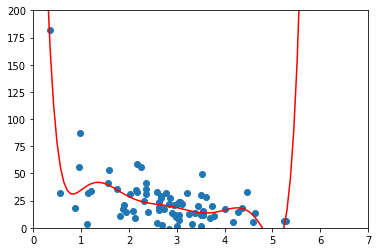

In [8]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100) # xp is an array of x-values generated by an array of 100 evenly spaced values between 0 and 7
# print(f"xp values:\n{xp}\n") # These values are used to evaluate the fitted polynomial function.

yp = p4(xp) # yp is an array of y-values generated by the evaluation of the polynomial function p4(xp) given by the array xp
# print(f"yp values of polynomial function: 0.734 x8 - 17.01 x7 + 165.7 x6 - 881.9 x5 + 2788 x4 - 5315 x3 + 5898 x2 - 3442 x + 838.4\n{yp}")

axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])

plt.scatter(x, y)
plt.plot(xp, yp, color='red') # plots the fitted polynomial curve 
# plt.plot(xp, p4(xp), color='red') # plots the fitted polynomial curve 
plt.show()

We can see above that there's an overfitting of our data.

Let's plot the polynomial against our test data

In [9]:
testx = np.array(testX) # Converts the test set array of page speeds into a NumPy array named x
testy = np.array(testY) # Converts the test set array of purchase amount into a NumPy array named y

p4 = np.poly1d(np.polyfit(testx, testy, 8))
print(p4)

      8         7         6        5             4             3
3.68 x - 82.68 x + 789.5 x - 4171 x + 1.328e+04 x - 2.594e+04 x
              2
 + 3.007e+04 x - 1.866e+04 x + 4672


Calculate the r² score for the test data:

In [10]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)

0.8499230141234072


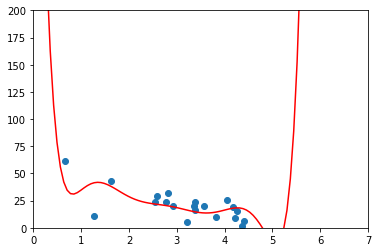

In [11]:
axes = plt.axes()
axes.set_xlim([0, 7])
axes.set_ylim([0, 200])

plt.scatter(testx, testy)
plt.plot(xp, yp, color='red') # plots the fitted polynomial curve 
plt.show()

Based on the r² score on the training and testing data:

* The r² score on the testing data is very low indicating that the model is not a great fit
* The r² score on the training data is slightly better 

Since an 8th-degree polynomial is not a great fit to the data, use different polynomial to find out the best fit